In [1]:
import numpy as np
import pandas as pd

In [2]:
import MySQLdb

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
import warnings
warnings.simplefilter("ignore")

### Input Data

In [6]:
def get_data(filename):
    #change for sharing
    with open("D:/github_projects/login.txt") as file:
        myserver_config = file.read().split(",") #config data for SQL server
        connect = MySQLdb.connect(*myserver_config)
        cursor = connect.cursor()
        query = f"SELECT * FROM {filename}"
        data = pd.read_sql(query, connect, index_col="id")
    return data

In [7]:
def change_types(mydata):
    mydata = mydata.replace("None", np.nan)
    for elem in ["Density", "Х", "У", "Scanning_spot"]:
        mydata[elem] = mydata[elem].str.replace(",", ".")
        mydata[elem] = mydata[elem].astype(np.float32)
    mydata["Lazer"] = mydata["Lazer"].astype(np.object_)
    #remove thickness due to its various
    mydata.drop("Thickness", inplace=True, axis=1)
    return mydata[mydata["Density"] < 100]


In [8]:
data = get_data("titanium_pure")

In [9]:
data = change_types(data)

### Data Preprocessing

Main data description

In [10]:
class DataPreprocessing:
    def __init__(self, df):
        self.__data = df
        self.numerical_cols = df.select_dtypes(["int", "float"]).columns
        self.categorical_cols = df.select_dtypes(["object"]).columns
    
    def Main_info(self):
        print(self.__data.head())
        print(self.__data.info())
        print(self.__data.describe())    

    def Numerical_review(self):
            
        print(*self.numerical_cols, sep=", ")
        for col in self.numerical_cols:
            sns.histplot(self.__data[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show();

    def Emmisions_review(self):

        print(*self.numerical_cols, sep=", ")
        for col in self.numerical_cols:
            sns.boxplot(self.__data[col])
            plt.title(f"Boxplot of {col}")
            plt.show();

    def Remove_emmisions(self, boarders=3):

        for col in self.numerical_cols:
            standart_deviasion = self.__data[col].std()
            self.__data = self.__data[(self.__data[col] < boarders*standart_deviasion) & (self.__data[col] > -boarders*standart_deviasion)]

        self.Emmisions_review()
        return self.__data

    def Correlation_review(self):

        corr_matrix = self.__data.select_dtypes(["int", "float"]).corr()
        sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm");

    def Categorical_review(self):
        
        print(*self.categorical_cols, sep=", ")
        for col in self.categorical_cols:
            sns.countplot(x = col, data=self.__data)
            plt.title(f"Countplot of {col}")
            plt.show();

    def One_hot_encoding(self):
        self.__data = pd.get_dummies(data=self.__data, columns=self.categorical_cols, drop_first=True)
        return self.__data

    def Standartization(self):
        columns = list(self.numerical_cols)
        columns.remove("Density")
        scalar = StandardScaler()
        self.__data[columns] = scalar.fit_transform(self.X[columns])
        return self.X


    @property
    def X(self):
        name = "Density"
        if name in self.__data.columns:
            return self.__data.drop("Density", axis=1)
        return self.__data
    
    @property
    def y(self):
        return self.__data["Density"]

In [11]:
instance = DataPreprocessing(data)

### Main data info

In [12]:
instance.Main_info()

   Lazer  Power  Speed  Scanning_speed Stratagy    Density     Х     У  \
id                                                                       
1      1    160    700              80    Lines  95.709999  85.0  15.0   
2      1    180    700              80    Lines  96.669998  60.0  15.0   
3      1    200    700              80    Lines  97.000000  35.0  15.0   
4      1    160    750              80    Lines  95.970001  10.0  15.0   
5      1    180    750              80    Lines  96.480003 -15.0  15.0   

    Scanning_spot  
id                 
1           227.0  
2           227.0  
3           227.0  
4           227.0  
5           227.0  
<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 1 to 492
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lazer           491 non-null    object 
 1   Power           491 non-null    int64  
 2   Speed           491 non-null    int64  
 3   Scanning_spe

### Numerical review

Power, Speed, Scanning_speed, Density, Х, У, Scanning_spot


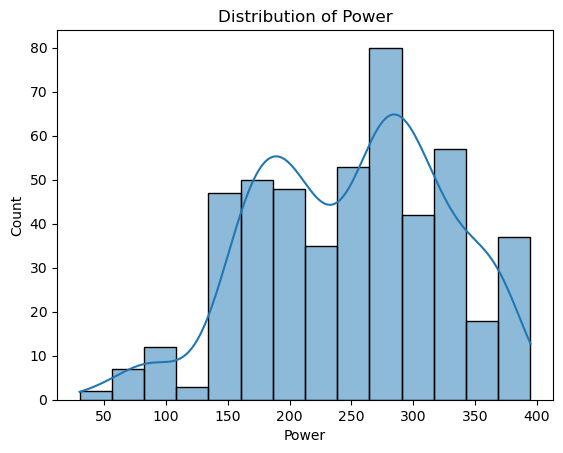

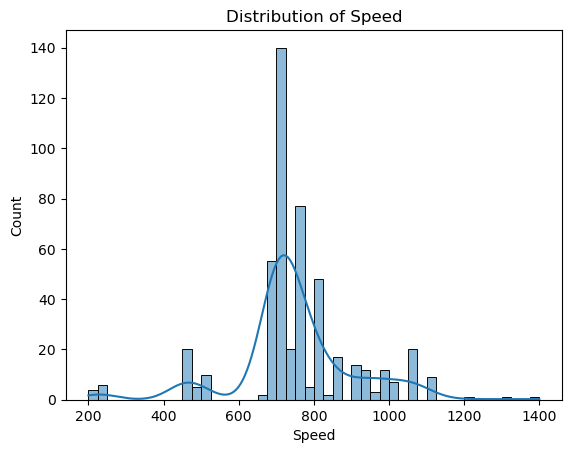

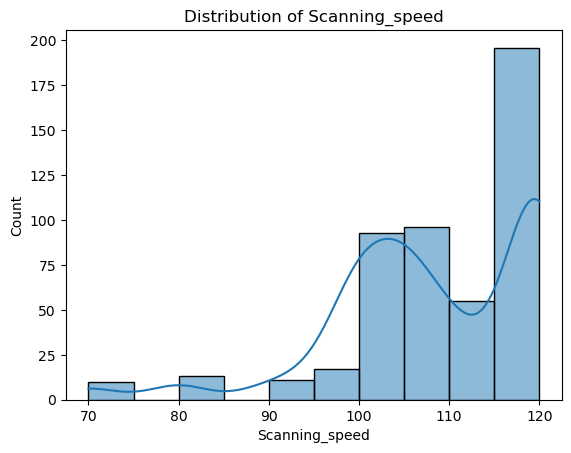

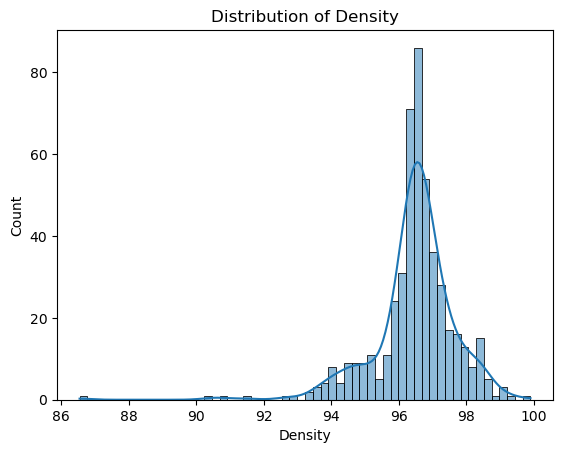

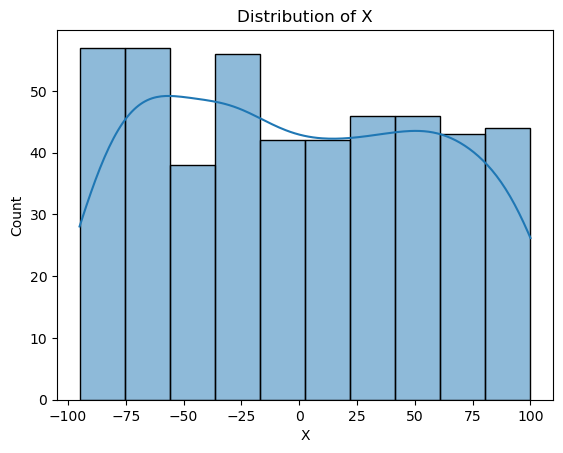

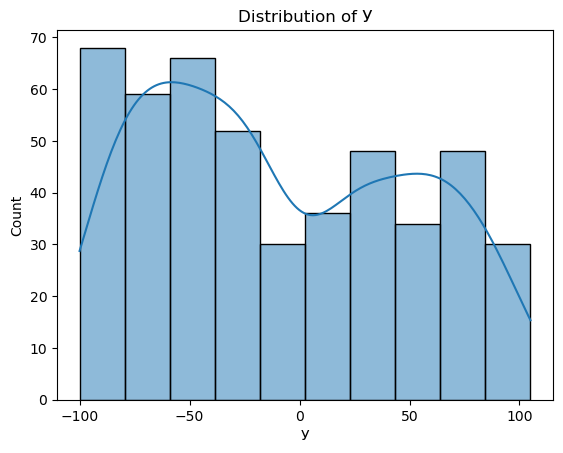

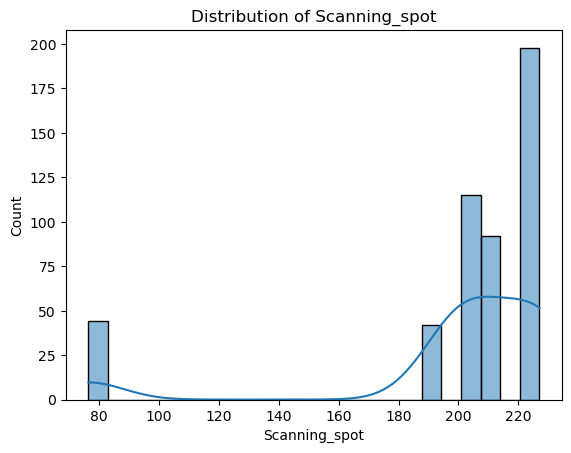

In [13]:
instance.Numerical_review()

### Emission in Data

Power, Speed, Scanning_speed, Density, Х, У, Scanning_spot


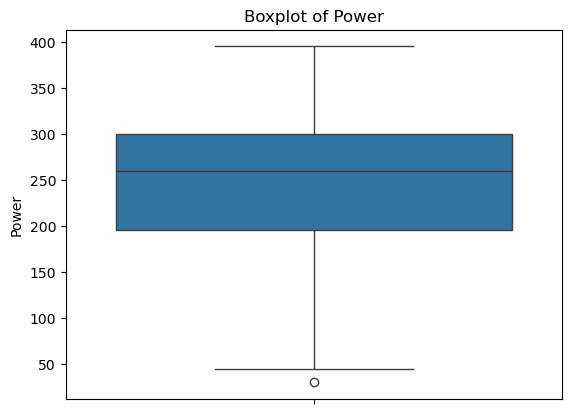

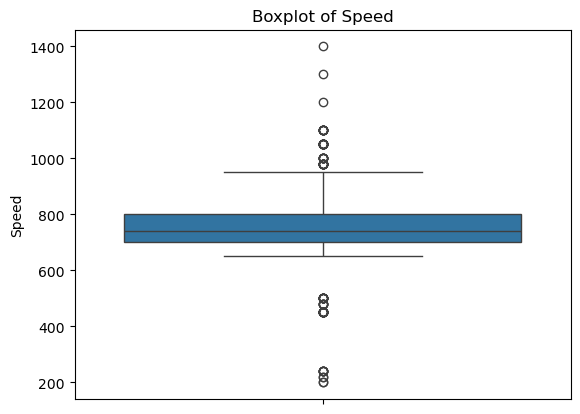

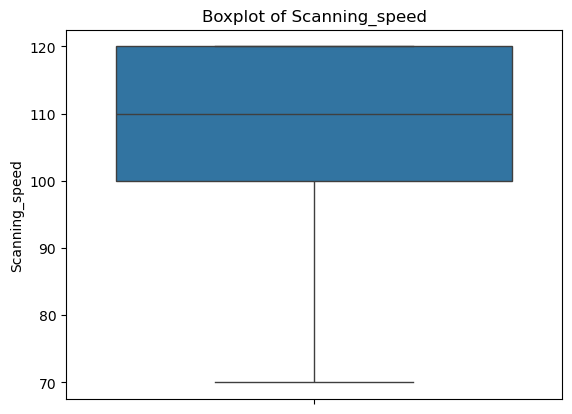

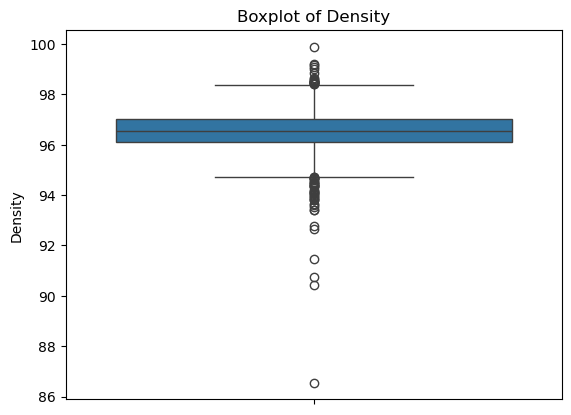

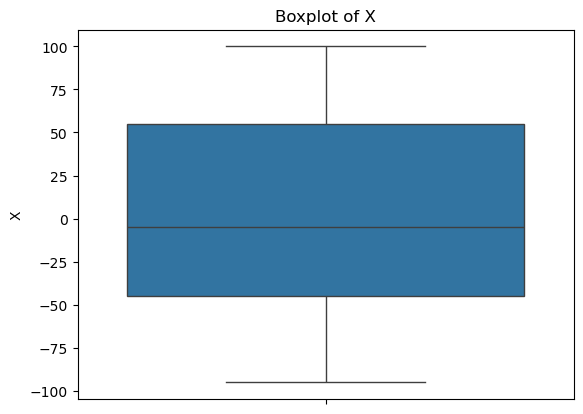

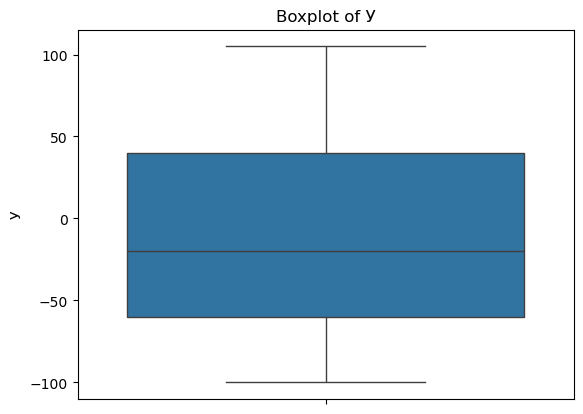

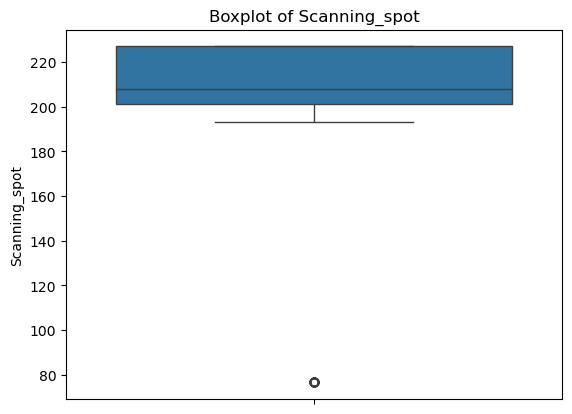

In [14]:
instance.Emmisions_review()

### Correlation review

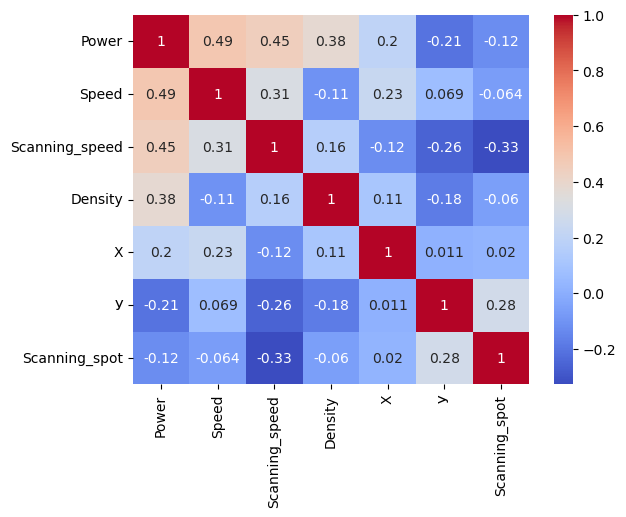

In [15]:
instance.Correlation_review()

### Categorical data review

Lazer, Stratagy


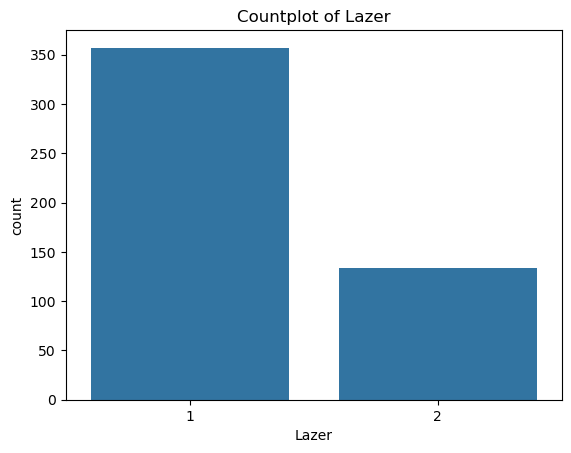

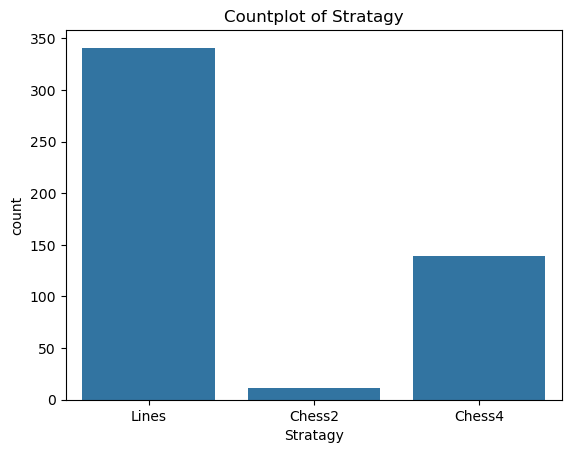

In [16]:
instance.Categorical_review()

### One Hot Encoding for Categorical fields

In [17]:
instance.One_hot_encoding()

,Power,Speed,Scanning_speed,Density,Х,У,Scanning_spot,Lazer_2,Stratagy_Chess4,Stratagy_Lines
id,,,,,,,,,,
1,160,700,80,95.709999,85.0,15.0,227.0,False,False,True
2,180,700,80,96.669998,60.0,15.0,227.0,False,False,True
3,200,700,80,97.000000,35.0,15.0,227.0,False,False,True
4,160,750,80,95.970001,10.0,15.0,227.0,False,False,True
5,180,750,80,96.480003,-15.0,15.0,227.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...
488,370,1100,120,96.730003,75.0,-60.0,76.5,False,True,False
489,385,1100,120,96.449997,75.0,-80.0,76.5,False,True,False
490,395,1100,120,97.809998,100.0,-90.0,76.5,False,True,False


### Standartization

In [18]:
instance.Standartization()

,Power,Speed,Scanning_speed,Х,У,Scanning_spot,Lazer_2,Stratagy_Chess4,Stratagy_Lines
id,,,,,,,,,
1,-1.199423,-0.312393,-2.485691,1.443329,0.414368,0.636133,False,False,True
2,-0.934295,-0.312393,-2.485691,1.019086,0.414368,0.636133,False,False,True
3,-0.669166,-0.312393,-2.485691,0.594842,0.414368,0.636133,False,False,True
4,-1.199423,0.005306,-2.485691,0.170598,0.414368,0.636133,False,False,True
5,-0.934295,0.005306,-2.485691,-0.253645,0.414368,0.636133,False,False,True
...,...,...,...,...,...,...,...,...,...
488,1.584427,2.229200,1.030006,1.273632,-0.871319,-3.039762,False,True,False
489,1.783273,2.229200,1.030006,1.273632,-1.214169,-3.039762,False,True,False
490,1.915838,2.229200,1.030006,1.697876,-1.385594,-3.039762,False,True,False


### Work with values

In [19]:
X = DataPreprocessing(instance.X)

Power, Speed, Scanning_speed, Х, У, Scanning_spot


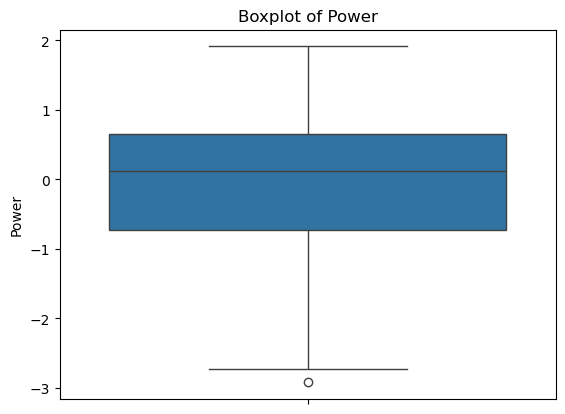

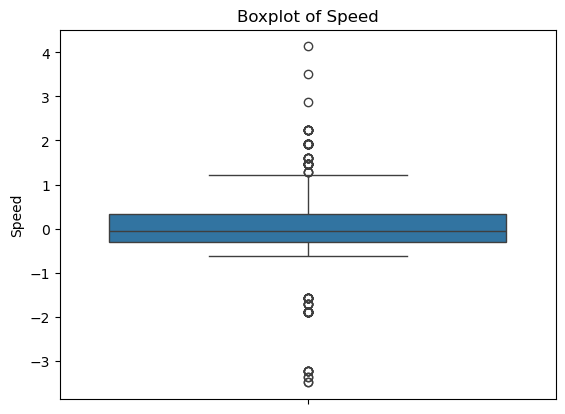

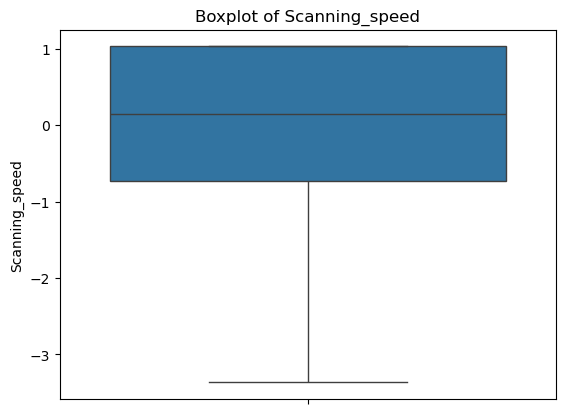

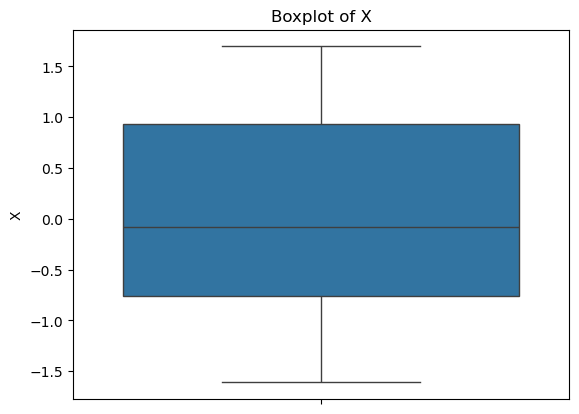

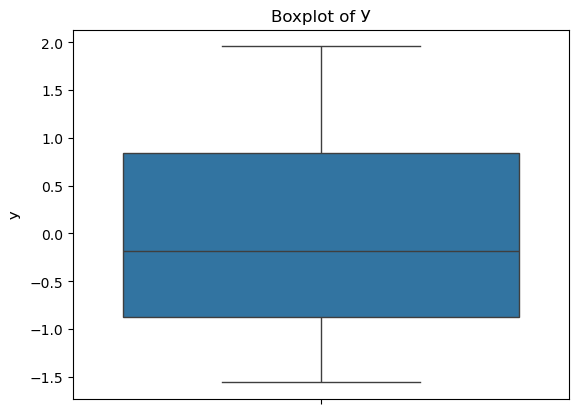

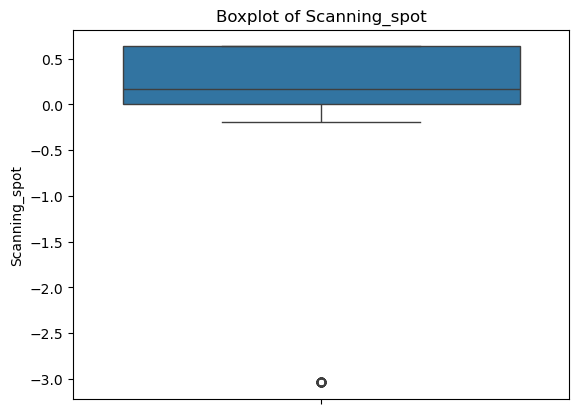

In [20]:
X.Emmisions_review()

Power, Speed, Scanning_speed, Х, У, Scanning_spot


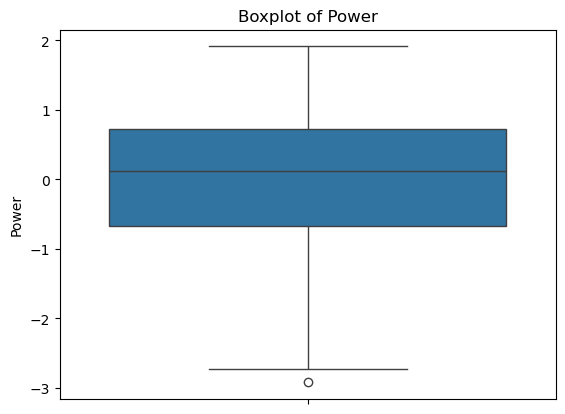

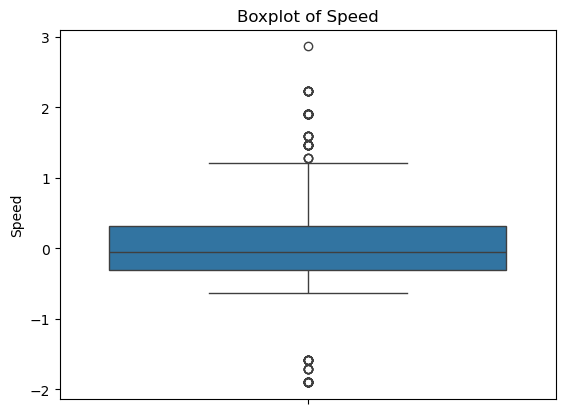

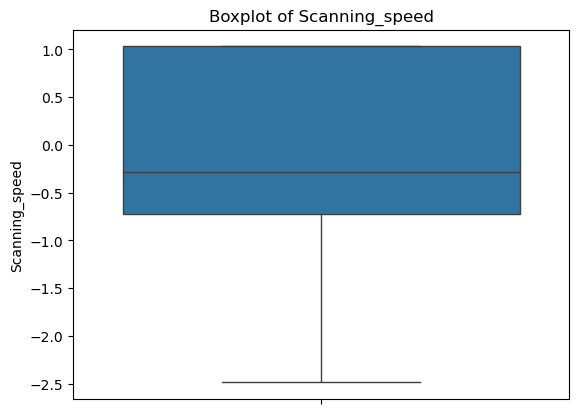

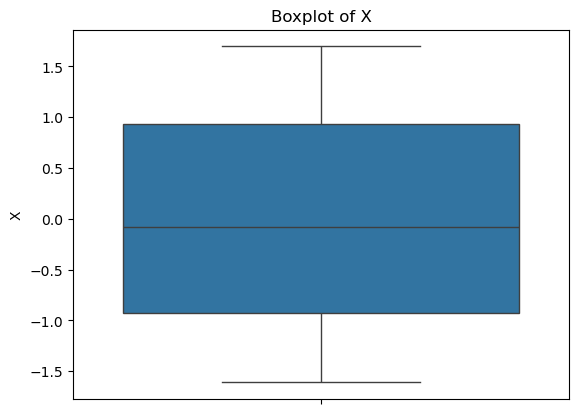

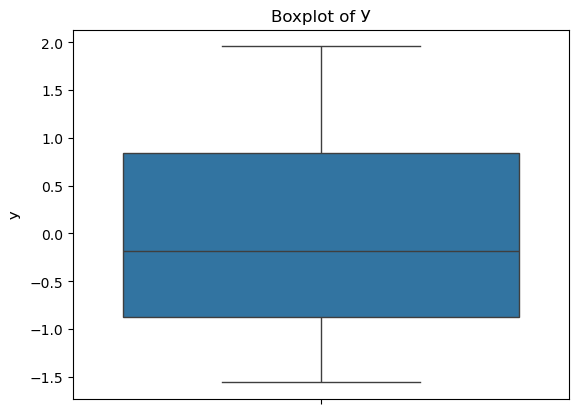

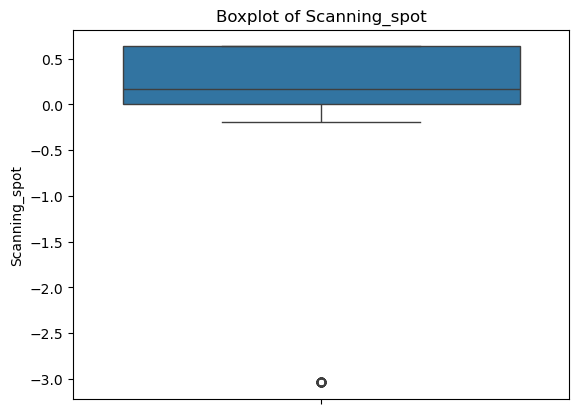

,Power,Speed,Scanning_speed,Х,У,Scanning_spot,Lazer_2,Stratagy_Chess4,Stratagy_Lines
id,,,,,,,,,
1,-1.199423,-0.312393,-2.485691,1.443329,0.414368,0.636133,False,False,True
2,-0.934295,-0.312393,-2.485691,1.019086,0.414368,0.636133,False,False,True
3,-0.669166,-0.312393,-2.485691,0.594842,0.414368,0.636133,False,False,True
4,-1.199423,0.005306,-2.485691,0.170598,0.414368,0.636133,False,False,True
5,-0.934295,0.005306,-2.485691,-0.253645,0.414368,0.636133,False,False,True
...,...,...,...,...,...,...,...,...,...
488,1.584427,2.229200,1.030006,1.273632,-0.871319,-3.039762,False,True,False
489,1.783273,2.229200,1.030006,1.273632,-1.214169,-3.039762,False,True,False
490,1.915838,2.229200,1.030006,1.697876,-1.385594,-3.039762,False,True,False


In [21]:
X.Remove_emmisions()

### PCA analysis

In [22]:
from sklearn.decomposition import PCA

In [23]:
class PCA_analysis:
    def __init__(self, data):
        self.__data = data
        
    def var_visualisation(self, var_threshold=0.9):
        max_principal = len(data.columns)
        principal = PCA(n_components=max_principal).fit(self.__data)
        
        x = []
        y = []
        for i in range(1, max_principal):
            y.append(sum(principal.explained_variance_ratio_[:i]))
            x.append(i)

        sns.barplot(x=x, y=y)
        sns.lineplot(y=var_threshold, x=plt.xlim(), c="r", label=f"threshold = {var_threshold}")
        plt.title("Explained Variance Ratio")
        plt.xlabel("Nums of components")
        plt.ylabel("Ratio")
        plt.legend()
        plt.grid()
        plt.show()

    def resolve_optimal_components(self, var_threshold=0.9):
        pca = None
        for i in range(1, len(data.columns) + 1):
            principal = PCA(n_components=i).fit(self.__data)
            if sum(principal.explained_variance_ratio_) >= var_threshold:
                pca = principal
                break
                
        components_df = pd.DataFrame(pca.components_, columns=self.__data.columns, index=[f"PC{k}" for k in range(1, i+1)])
        print("PCA:\n", components_df)

        return principal.transform
    
            
        

In [24]:
instance = PCA_analysis(X.X)

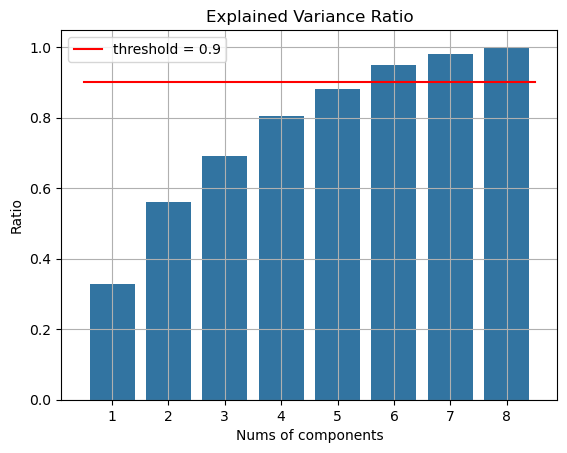

In [25]:
instance.var_visualisation()

In [26]:
X = instance.resolve_optimal_components()(X.X)

PCA:
         Power     Speed  Scanning_speed         Х         У  Scanning_spot  \
PC1 -0.424239 -0.204394       -0.445311 -0.160656  0.420048       0.516187   
PC2  0.392179  0.500954       -0.124676  0.629726  0.280700       0.293183   
PC3 -0.299083  0.238289        0.034540  0.000600  0.694539      -0.589103   
PC4 -0.496029 -0.105925       -0.389072  0.612728 -0.377482      -0.244105   
PC5 -0.213304 -0.428169        0.660601  0.409493  0.225197       0.287127   
PC6 -0.486288  0.647407        0.270955 -0.174738 -0.208940       0.311629   

      Lazer_2  Stratagy_Chess4  Stratagy_Lines  
PC1  0.034780        -0.233352        0.235754  
PC2  0.015087        -0.089825        0.100482  
PC3  0.002055         0.111108       -0.103912  
PC4 -0.102630         0.032427       -0.047525  
PC5  0.004459         0.122431       -0.137587  
PC6 -0.285156         0.082072       -0.107798  


In [27]:
X

array([[ 2.10624918,  0.92284485,  0.04484011,  2.22973271, -0.43853901,
        -0.44902784],
       [ 2.06192876,  0.75966524, -0.03470994,  1.83827527, -0.66881692,
        -0.50382529],
       [ 2.01760833,  0.59648562, -0.11425999,  1.44681783, -0.89909484,
        -0.55862274],
       ...,
       [-4.46395037,  1.36651151,  0.97069251,  0.86007096, -0.96533855,
         0.01006115],
       [-3.00515456,  1.66151821,  1.21686144,  1.92093489, -2.55929251,
        -0.6148598 ],
       [-3.2525361 ,  1.64817564,  1.48534173,  1.44955061, -1.90146589,
        -0.44834581]])

### Machine Learning